In [1]:
import cifar10
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
import cv2
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
x_train=images_train
y_train=cls_train
x_test=images_test
y_test=cls_test

In [7]:
#Shape of Training and Testing Data
print(f"Shape of x_train:{x_train.shape}, Shape of y_train:{y_train.shape}")
print(f"Shape of x_test:{x_test.shape}, Shape of y_test:{y_test.shape}")

Shape of x_train:(50000, 32, 32, 3), Shape of y_train:(50000,)
Shape of x_test:(10000, 32, 32, 3), Shape of y_test:(10000,)


In [8]:
def names(y):
    ls=[]
    for i in y:
        ls.append(class_names[i])
    return ls

In [9]:
dic={}

for i in names(cls_train):
    dic[i]=dic.get(i,0)+1
dic

{'frog': 5000,
 'truck': 5000,
 'deer': 5000,
 'automobile': 5000,
 'bird': 5000,
 'horse': 5000,
 'ship': 5000,
 'cat': 5000,
 'dog': 5000,
 'airplane': 5000}

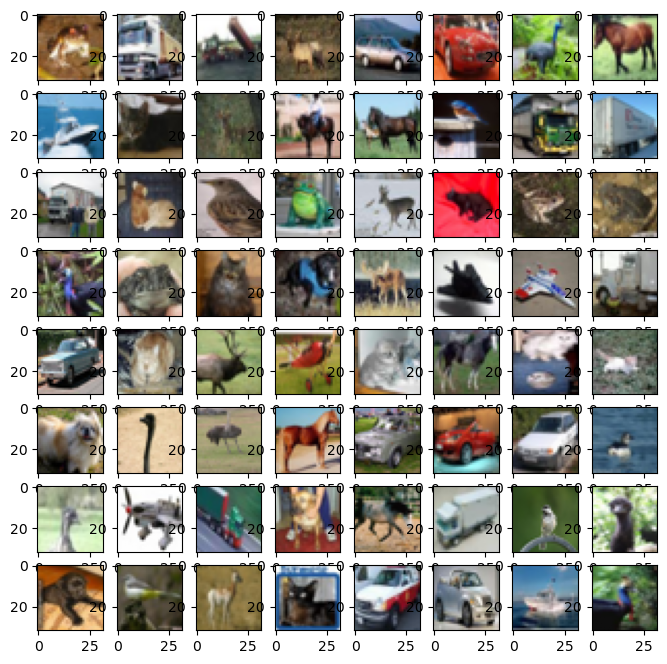

In [10]:
#plotting first 64 images from training data

fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_train[i],cmap=plt.cm.bone)
plt.show()

# Model Creation

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))	
model.add(tf.keras.layers.Dense(10, activation='softmax'))

2023-08-29 19:37:17.734325: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-08-29 19:37:17.734349: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-29 19:37:17.734353: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-29 19:37:17.734451: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-29 19:37:17.734616: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
# compile model
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ck = tf.keras.callbacks.ModelCheckpoint('best_model.hdf5' , save_best_only=True,monitor='val_loss',mode='min')
#es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)


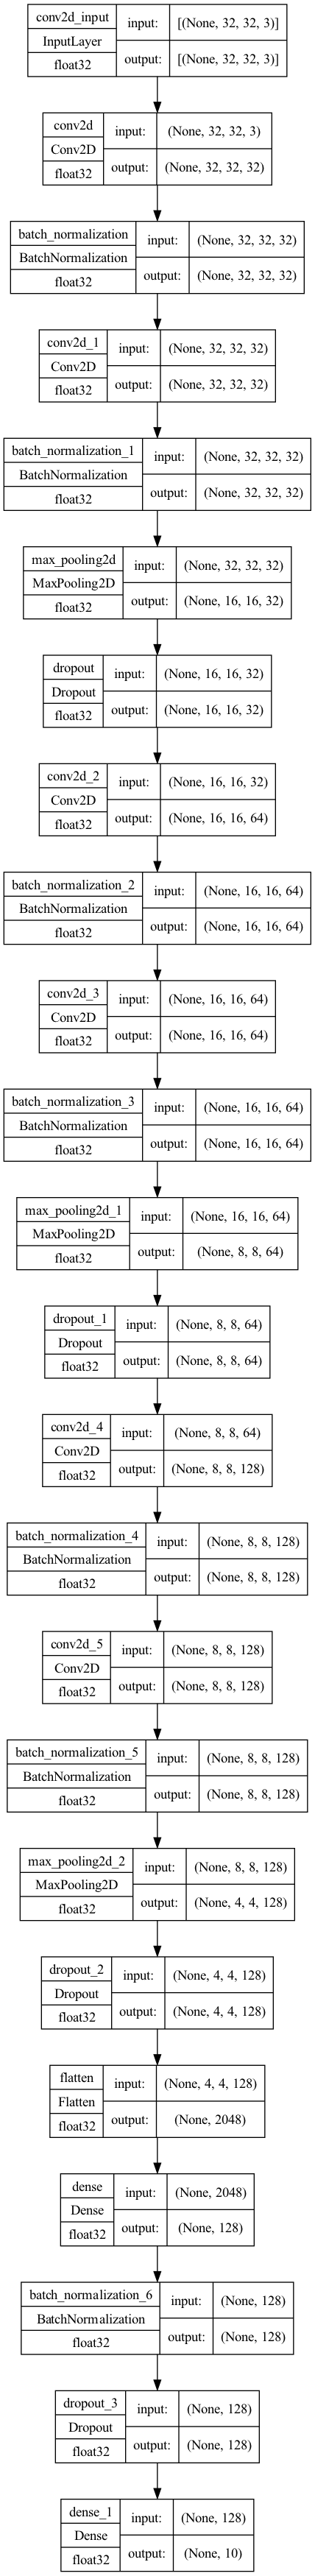

In [13]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)

In [13]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[ck])

Epoch 1/100


2023-08-29 17:18:42.551370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.6258 - accuracy: 0.4331

2023-08-29 17:18:54.474698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 13s 16ms/step - loss: 1.6258 - accuracy: 0.4331 - val_loss: 1.1553 - val_accuracy: 0.5896
Epoch 2/100
782/782 [==============================] - 12s 15ms/step - loss: 1.0938 - accuracy: 0.6105 - val_loss: 0.9206 - val_accuracy: 0.6660
Epoch 3/100
782/782 [==============================] - 12s 15ms/step - loss: 0.8928 - accuracy: 0.6862 - val_loss: 0.8366 - val_accuracy: 0.7019
Epoch 4/100
782/782 [==============================] - 12s 16ms/step - loss: 0.7767 - accuracy: 0.7283 - val_loss: 0.7250 - val_accuracy: 0.7485
Epoch 5/100
782/782 [==============================] - 13s 16ms/step - loss: 0.7000 - accuracy: 0.7562 - val_loss: 0.6550 - val_accuracy: 0.7730
Epoch 6/100
782/782 [==============================] - 13s 17ms/step - loss: 0.6444 - accuracy: 0.7764 - val_loss: 0.6859 - val_accuracy: 0.7680
Epoch 7/100
782/782 [==============================] - 13s 16ms/step - loss: 0.5986 - accuracy: 0.7919 - val_loss: 0.6435 - val_accuracy: 0.77

In [14]:
def plot_accuracy_loss(history):
    """
        We plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

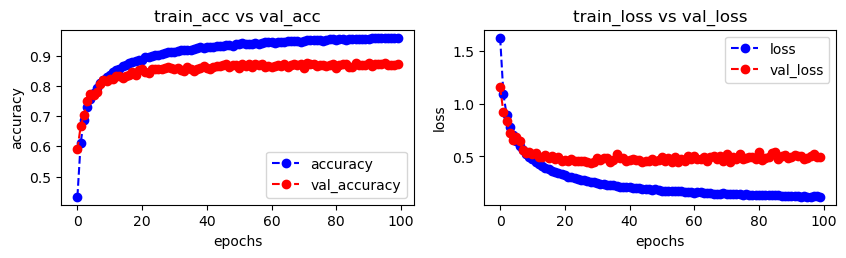

In [15]:
plot_accuracy_loss(history)

In [23]:
model = tf.keras.models.load_model('./best_model.hdf5')

In [24]:
test_loss = model.evaluate(x_test, y_test)

 18/313 [>.............................] - ETA: 1s - loss: 0.3505 - accuracy: 0.8785

2023-08-29 17:40:09.041483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.4382 - accuracy: 0.8634


In [25]:
prediction = model.predict(x_test)

 28/313 [=>............................] - ETA: 1s

2023-08-29 17:40:12.351350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


In [26]:
pred_label = np.argmax(prediction, axis = 1) # We take the highest probability

In [27]:
y_pred=names(pred_label)
y_pred

['cat',
 'ship',
 'ship',
 'ship',
 'frog',
 'frog',
 'automobile',
 'frog',
 'cat',
 'automobile',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'ship',
 'dog',
 'horse',
 'ship',
 'frog',
 'horse',
 'airplane',
 'deer',
 'truck',
 'deer',
 'bird',
 'deer',
 'airplane',
 'truck',
 'frog',
 'frog',
 'dog',
 'deer',
 'dog',
 'truck',
 'cat',
 'deer',
 'truck',
 'truck',
 'dog',
 'deer',
 'frog',
 'cat',
 'frog',
 'airplane',
 'truck',
 'cat',
 'truck',
 'horse',
 'frog',
 'truck',
 'ship',
 'horse',
 'cat',
 'ship',
 'ship',
 'horse',
 'cat',
 'deer',
 'frog',
 'horse',
 'dog',
 'frog',
 'cat',
 'frog',
 'bird',
 'automobile',
 'bird',
 'dog',
 'horse',
 'bird',
 'frog',
 'ship',
 'ship',
 'airplane',
 'bird',
 'truck',
 'cat',
 'dog',
 'ship',
 'ship',
 'automobile',
 'automobile',
 'horse',
 'bird',
 'truck',
 'bird',
 'airplane',
 'ship',
 'truck',
 'airplane',
 'frog',
 'ship',
 'frog',
 'deer',
 'frog',
 'frog',
 'airplane',
 'airplane',
 'horse',
 'deer',
 'dog',
 'frog',
 '

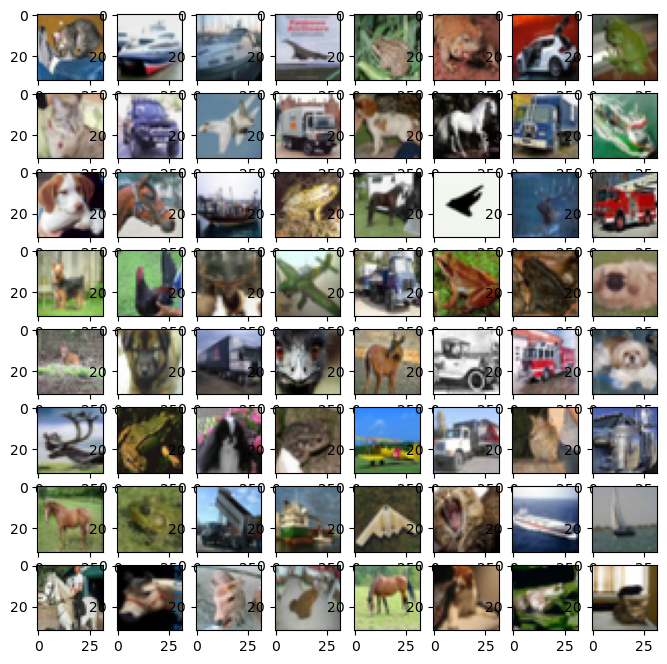

In [28]:
#plotting testing data
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_test[i],cmap=plt.cm.bone)
plt.show()

In [29]:
ser=pd.Series(y_pred)
ser.to_csv('Cifar10.csv',index=False,header=None)